<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [85]:
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install yfinance

In [71]:
start= "2014-01-01"
end="2022-04-26"
ticket= "TSLA"

import yfinance as yf

Acciones_tesla=yf.download(ticket, start, end)

[*********************100%***********************]  1 of 1 completed


In [72]:
Acciones_tesla.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22726900


<AxesSubplot:xlabel='Date'>

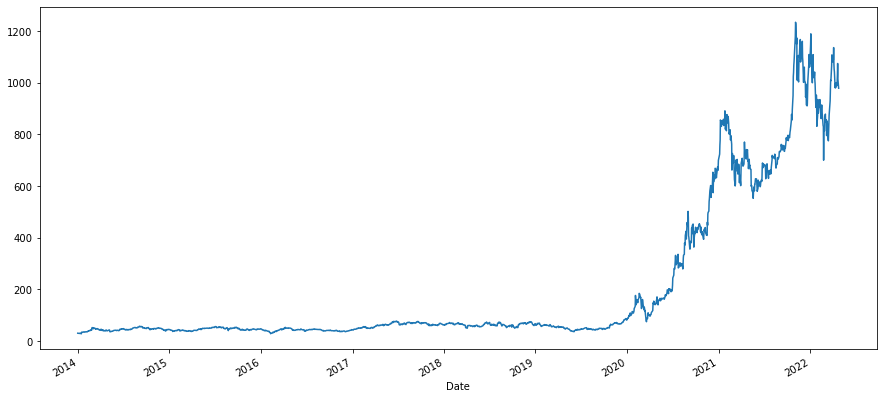

In [ ]:
Acciones_tesla["Open"].plot(label="Tesla", figsize=(15,7))

In [8]:
Acciones_tesla["TE10"]=Acciones_tesla["Open"].rolling(10).mean()
Acciones_tesla["TE20"]=Acciones_tesla["Open"].rolling(20).mean()
Acciones_tesla["TE50"]=Acciones_tesla["Open"].rolling(50).mean()
Acciones_tesla["TE100"]=Acciones_tesla["Open"].rolling(100).mean()
Acciones_tesla["TE200"]=Acciones_tesla["Open"].rolling(200).mean()

In [10]:
Acciones_tesla.tail(3)

,Open,High,Low,Close,Adj Close,Volume,TE10,TE20,TE50,TE100,TE200
Date,,,,,,,,,,,
2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800,1015.283002,1045.484500,933.493600,973.157000,896.18610
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600,1011.534998,1045.743500,935.091799,972.296199,898.11880
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22726900,1005.110999,1044.291998,936.503799,970.642199,899.74775


In [11]:
Acciones_tesla2=Acciones_tesla.dropna()

In [12]:
nAcciones_tesla2.tail(3)

,Open,High,Low,Close,Adj Close,Volume,TE10,TE20,TE50,TE100,TE200
Date,,,,,,,,,,,
2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800,1015.283002,1045.484500,933.493600,973.157000,896.18610
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600,1011.534998,1045.743500,935.091799,972.296199,898.11880
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22726900,1005.110999,1044.291998,936.503799,970.642199,899.74775


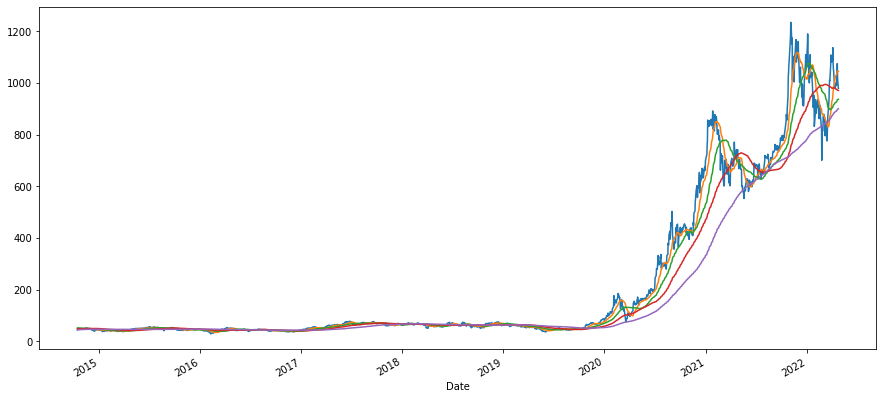

In [13]:
#vemos una gráfica con esta métrica
Acciones_tesla2["Open"].plot(label="Tesla", figsize=(15,7))
Acciones_tesla2["TE20"].plot()
Acciones_tesla2["TE50"].plot()
Acciones_tesla2["TE100"].plot()
Acciones_tesla2["TE200"].plot()

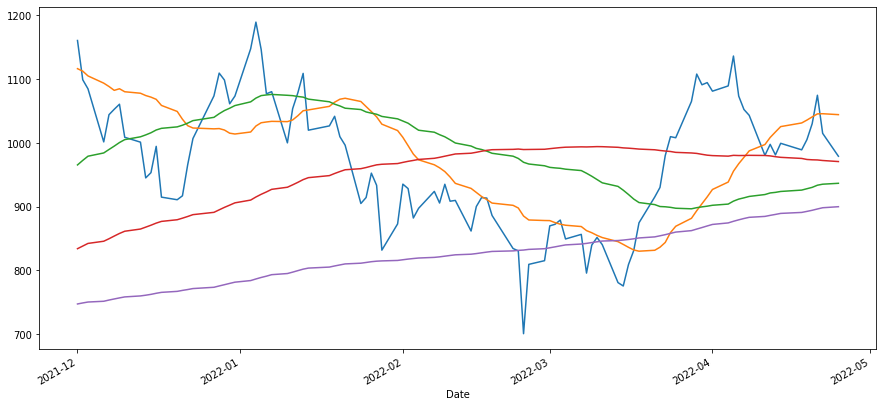

In [14]:
#vemos una gráfica con esta métrica de los últimos 100 días 

Acciones_tesla2["Open"].iloc[-100:].plot(label="Tesla", figsize=(15,7))
Acciones_tesla2["TE20"].iloc[-100:].plot(label="TE20")
Acciones_tesla2["TE50"].iloc[-100:].plot()
Acciones_tesla2["TE100"].iloc[-100:].plot()
Acciones_tesla2["TE200"].iloc[-100:].plot()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


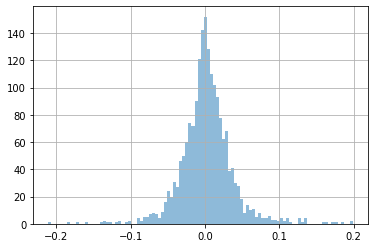

In [41]:
#veamos ahora una gráfica con la volatilidad de la acción, calulando el incremento porcentual del valor

Acciones_tesla2["Aumento"]=(Acciones_tesla2["Close"]/Acciones_tesla2["Close"].shift(1)) -1

Acciones_tesla2["Aumento"].hist(bins=100, label="Tesla", alpha=0.5)

<AxesSubplot:xlabel='Date'>

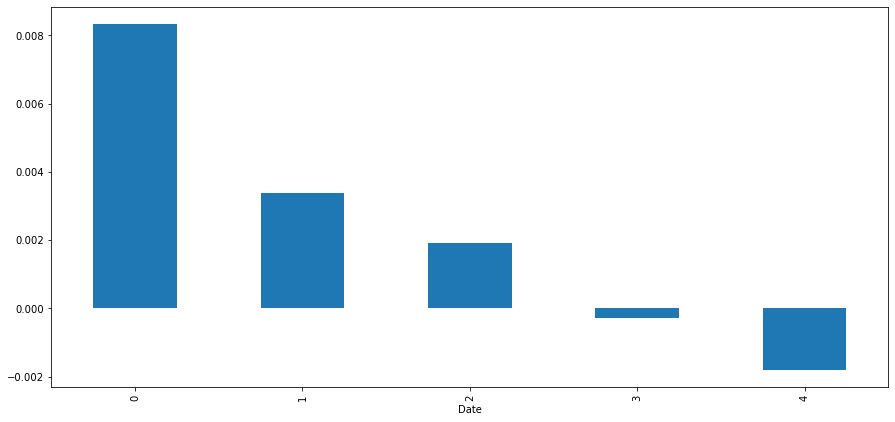

In [ ]:
#vamos a ver en otra gráfica cómo varía el valor por días de la semana 
Acciones_tesla2.Close.pct_change().groupby(Acciones_tesla2.index.dayofweek).mean().plot(kind='bar', figsize=(15,7))

In [15]:
#vamos a instalar ahora una herramienta de análisis técnico de pandas

!pip install pandas_ta

In [16]:
import pandas_ta as ta

In [ ]:
 #podemos calcular las medias móviles exponenciales a 20 y 60 días

In [ ]:
Acciones_tesla2['EXP_4'] = ta.ema(Acciones_tesla2['Close'], 4)
Acciones_tesla2['EXP_20'] = ta.ema(Acciones_tesla2['Close'], 20)
Acciones_tesla2['EXP_60'] = ta.ema(Acciones_tesla2['Close'], 60)

In [42]:
Acciones_tesla2.tail(2)

,Open,High,Low,Close,Adj Close,Volume,TE10,TE20,TE50,TE100,TE200,EXP_4,EXP_20,EXP_60,Aumento
Date,,,,,,,,,,,,,,,
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600,1011.534998,1045.743500,935.091799,972.296199,898.11880,1003.666459,1005.603856,970.765260,-0.003698
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22726900,1005.110999,1044.291998,936.503799,970.642199,899.74775,1001.407883,1004.881586,971.658859,-0.006995


In [44]:
Acciones_tesla3=Acciones_tesla2.dropna()

In [45]:
Acciones_tesla3.head(2)

,Open,High,Low,Close,Adj Close,Volume,TE10,TE20,TE50,TE100,TE200,EXP_4,EXP_20,EXP_60,Aumento
Date,,,,,,,,,,,,,,,
2015-01-12,40.610001,40.894001,39.849998,40.442001,40.442001,29751500,43.1918,42.8531,45.85712,48.3490,45.92714,41.372224,43.133572,45.903067,-0.021533
2015-01-13,40.664001,41.521999,40.181999,40.849998,40.849998,22386500,42.7202,42.8381,45.71784,48.2463,45.91766,41.163334,42.916089,45.737392,0.010088


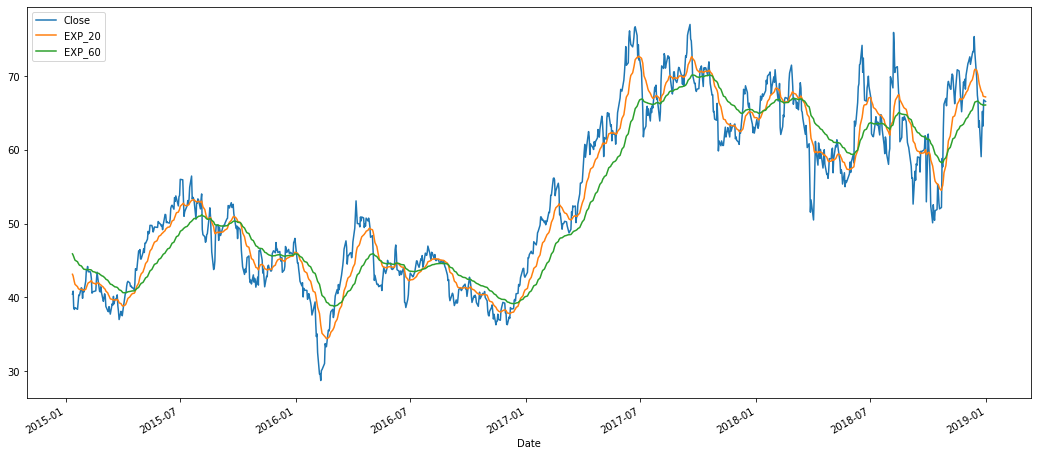

In [46]:
#vemos una gráfica de los ratios exponenciales para los 1000 primeros días con datos

Acciones_tesla3[['Close','EXP_20','EXP_60']].iloc[:1000].plot(figsize=(18,8))

In [ ]:
#En la gráfica anterior podemos ver que cuando el valor de EXP_20, es decir, la media exponencial a 20 días, supera el valor 
# del EXP 60, es buen momento para comprar, y cuando ocurre lo contrario, es decir, el valor de EXP 20 se coloca por 
# debajo de EXP 60 es buen momento de vender

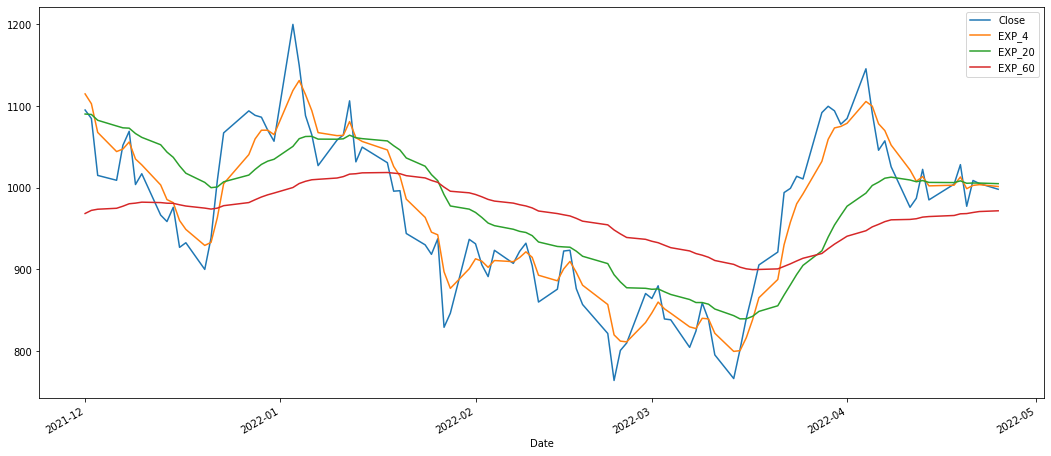

In [47]:
#veamos los últimos 100 días 
Acciones_tesla3[['Close', "EXP_4",'EXP_20','EXP_60']].iloc[-100:].plot(figsize=(18,8))

In [ ]:
#Se cumple que cuando el EXP 20 se coloca por debajo de EXP 60 era momento de vender y al revés.
#Y más todavía si consideramos EXP 4, cuándo está cruza por arriba a las otras dos, es momento claro de compra y al contrario


In [ ]:
#Calculamos ahora el indicador financiero ATR, average true range, que mide la volatilidad de una acción en un período 
#de tiempo completo, usamos 7 días

Acciones_tesla3['ATR_7'] = ta.atr(Acciones_tesla3.High, Acciones_tesla3.Low, Acciones_tesla3.Close, n=7)

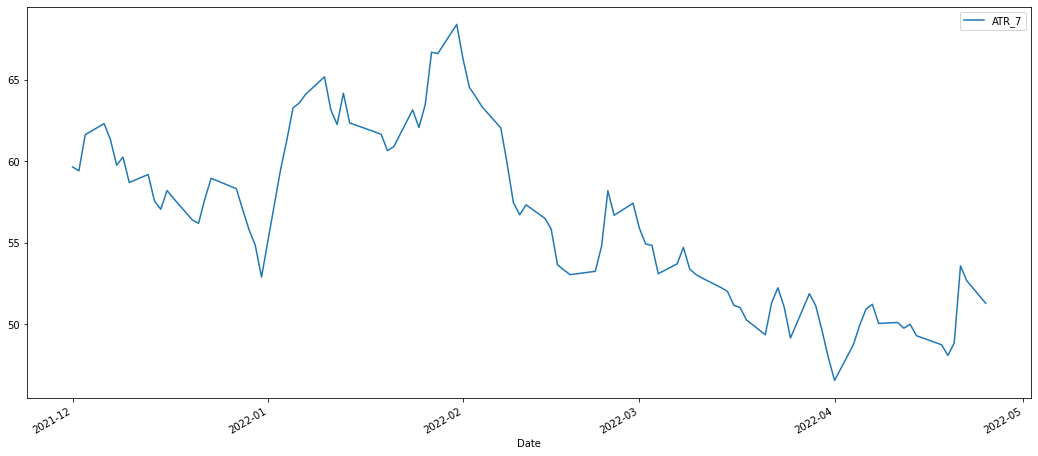

In [61]:
#veamos una gráfica del ATR7
Acciones_tesla3[["ATR_7"]].iloc[-100:].plot(figsize=(18,8))

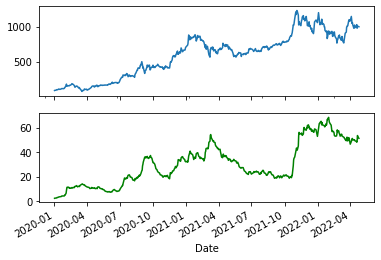

In [60]:
# Usamos subplot para obtener dos gráficas y hacemos que compartan el eje de X.
ax1 = plt.subplot(211)  
Acciones_tesla3["2020":].Close.plot()
ax1 = plt.subplot(212)
Acciones_tesla3["2020":].ATR_7.plot(c='g', sharex=ax1)

In [ ]:
#Ahora vamos a comparar algunos valores
#introducimos otra columna con la diferencia relativa entre mínimo y máximo del mismo día

Acciones_tesla3["Rango"]=(Acciones_tesla3["High"]-Acciones_tesla3["Low"])/Acciones_tesla3["Low"]

In [63]:
Acciones_tesla3.head(2)

,Open,High,Low,Close,Adj Close,Volume,TE10,TE20,TE50,TE100,TE200,EXP_4,EXP_20,EXP_60,Aumento,ATR_7,Rango
Date,,,,,,,,,,,,,,,,,
2015-01-12,40.610001,40.894001,39.849998,40.442001,40.442001,29751500,43.1918,42.8531,45.85712,48.3490,45.92714,41.372224,43.133572,45.903067,-0.021533,NaN,0.026198
2015-01-13,40.664001,41.521999,40.181999,40.849998,40.849998,22386500,42.7202,42.8381,45.71784,48.2463,45.91766,41.163334,42.916089,45.737392,0.010088,NaN,0.033348


In [64]:
Acciones_tesla3=Acciones_tesla3.drop(columns="Adj Close")


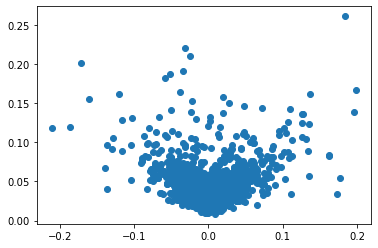

In [ ]:
#Ahora vemos una gráfica con la relación entre el aumento porcentual diario y el rango (mínimo-máximo)

plt.scatter(Acciones_tesla3.Aumento, Acciones_tesla3.Rango)

In [65]:
#Introducimos otro indicador financiero de intensidad de compra o venta, el RSI a 10 días

Acciones_tesla3["RSI10"]=ta.rsi(close=Acciones_tesla3.Close, length=10)

In [66]:
Acciones_tesla3.head(2)

,Open,High,Low,Close,Volume,TE10,TE20,TE50,TE100,TE200,EXP_4,EXP_20,EXP_60,Aumento,ATR_7,Rango,RSI10
Date,,,,,,,,,,,,,,,,,
2015-01-12,40.610001,40.894001,39.849998,40.442001,29751500,43.1918,42.8531,45.85712,48.3490,45.92714,41.372224,43.133572,45.903067,-0.021533,NaN,0.026198,NaN
2015-01-13,40.664001,41.521999,40.181999,40.849998,22386500,42.7202,42.8381,45.71784,48.2463,45.91766,41.163334,42.916089,45.737392,0.010088,NaN,0.033348,NaN


In [ ]:
#Agregamos al conjunto de datos tanto los valores del petroleo Brent como los valores del Botcoin 

[*********************100%***********************]  1 of 1 completed


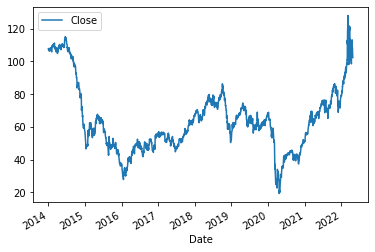

In [67]:
Cotizacion_brent=yf.download("BZ=F", start, end)

Cotizacion_brent.plot.line(y="Close")

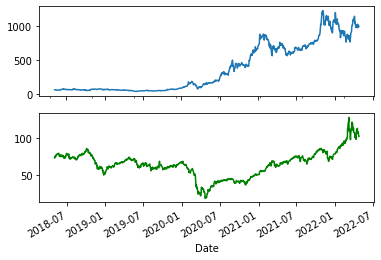

In [68]:
# Usamos subplot para obtener dos gráficas y hacemos que compartan el eje de X.

ax2 = plt.subplot(211)  
Acciones_tesla3[-1000:].Close.plot()
ax2 = plt.subplot(212)
Cotizacion_brent[-1000:].Close.plot(c='g', sharex=ax2)


In [76]:
#cambiamos el nombre de la columna Close del Brent para evitar confusiones futuras

Cotizacion_brent=Cotizacion_brent.rename(columns={"Close": "CloseBRENT"})

[*********************100%***********************]  1 of 1 completed


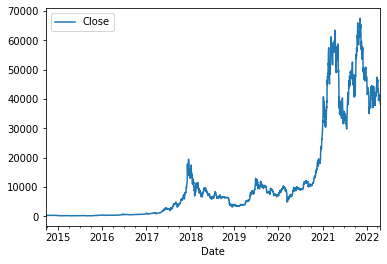

In [77]:
#intriducimos ahora la cotización de bitcoin 

Cotizacion_btc=yf.download("BTC-USD", start, end)

Cotizacion_btc.plot.line(y="Close")

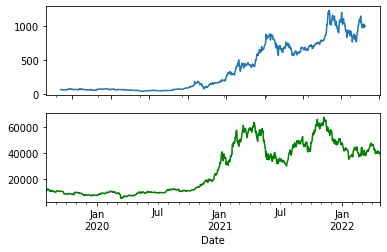

In [78]:
# Usamos subplot para obtener dos gráficas y hacemos que compartan el eje de X.

ax2 = plt.subplot(211)  
Acciones_tesla3[-1000:].Close.plot()
ax2 = plt.subplot(212)
Cotizacion_btc[-1000:].Close.plot(c='g', sharex=ax2)



In [79]:
#cambiamos el nombre de la columna Close del Botcoin evitar confusiones futuras

Cotizacion_btc=Cotizacion_btc.rename(columns={"Close": "CloseBTC"})

In [80]:
#unimos los datos

Acciones_=Acciones_tesla3.join(Cotizacion_brent["CloseBRENT"])

Acciones=Acciones_.join(Cotizacion_btc["CloseBTC"])



In [81]:
Acciones=Acciones.dropna()

In [82]:
Acciones.tail(2)

,Open,High,Low,Close,Volume,TE10,TE20,TE50,TE100,TE200,EXP_4,EXP_20,EXP_60,Aumento,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Date,,,,,,,,,,,,,,,,,,,
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,23181600,1011.534998,1045.743500,935.091799,972.296199,898.11880,1003.666459,1005.603856,970.765260,-0.003698,52.674392,0.041097,49.661314,106.650002,39740.320312
2022-04-25,978.969971,1008.619995,975.299988,998.020020,22726900,1005.110999,1044.291998,936.503799,970.642199,899.74775,1001.407883,1004.881586,971.658859,-0.006995,51.291936,0.034164,48.348594,102.320000,40458.308594


In [ ]:
#vemaos una gráfica de la cotización de Tesla, Brent y Bitcoin 

#Acciones["Close"].plot(label="Tesla", figsize=(15,7))
#Acciones["CloseBRENT"].plot()
#Acciones["CloseBTC"].plot()


In [83]:
#veamos las correlaciones
Acciones.corr()

,Open,High,Low,Close,Volume,TE10,TE20,TE50,TE100,TE200,EXP_4,EXP_20,EXP_60,Aumento,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Open,1.000000,0.999693,0.999566,0.999134,-0.071909,0.996655,0.993119,0.983848,0.971883,0.960406,0.999439,0.995720,0.987571,0.010949,0.946380,0.195059,0.095130,0.483898,0.927906
High,0.999693,1.000000,0.999542,0.999614,-0.066691,0.996552,0.993076,0.983892,0.971857,0.960096,0.999536,0.995714,0.987565,0.020779,0.947964,0.202984,0.097651,0.484011,0.927483
Low,0.999566,0.999542,1.000000,0.999620,-0.077126,0.996000,0.992389,0.983185,0.971916,0.961197,0.999338,0.995162,0.987153,0.021226,0.943007,0.183286,0.100996,0.485108,0.928701
Close,0.999134,0.999614,0.999620,1.000000,-0.070708,0.995974,0.992406,0.983205,0.971520,0.960242,0.999369,0.995181,0.987034,0.032267,0.945304,0.193737,0.102622,0.484021,0.928088
Volume,-0.071909,-0.066691,-0.077126,-0.070708,1.000000,-0.079391,-0.085290,-0.098288,-0.119045,-0.144446,-0.073834,-0.083915,-0.100791,0.098958,0.008969,0.663232,0.114551,-0.129442,-0.071330
TE10,0.996655,0.996552,0.996000,0.995974,-0.079391,1.000000,0.998096,0.989255,0.976561,0.964083,0.998142,0.999134,0.992304,0.001762,0.953811,0.202589,0.058135,0.486001,0.928878
TE20,0.993119,0.993076,0.992389,0.992406,-0.085290,0.998096,1.000000,0.993983,0.981212,0.967731,0.994776,0.999480,0.995709,0.001313,0.958435,0.204208,0.036030,0.490353,0.930255
TE50,0.983848,0.983892,0.983185,0.983205,-0.098288,0.989255,0.993983,1.000000,0.992626,0.978202,0.985504,0.993877,0.999061,0.002519,0.959623,0.200033,0.015345,0.512947,0.932360
TE100,0.971883,0.971857,0.971916,0.971520,-0.119045,0.976561,0.981212,0.992626,1.000000,0.991242,0.973514,0.982054,0.994331,0.002909,0.938848,0.177226,0.012475,0.553680,0.927674
TE200,0.960406,0.960096,0.961197,0.960242,-0.144446,0.964083,0.967731,0.978202,0.991242,1.000000,0.961900,0.969074,0.982587,0.002687,0.901236,0.147350,0.023976,0.590156,0.924728


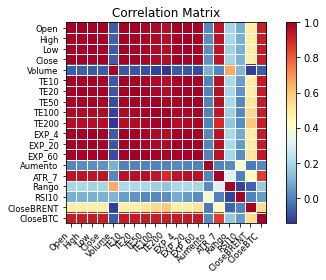

In [90]:
corr1= Acciones.corr()
sm.graphics.plot_corr(corr1, xnames=list(corr1.columns))
plt.show()

In [ ]:
#AJUSTE DE LOS DATOS
#Ahora vamos a preparar el conjunto de datos para predecir el valor futuro de la cotización.
#Para ello creamos otro conjunto de datos que modificaremos

In [92]:
datosT=Acciones[["Close", "High", "Open", "Low"]]

datosT=datosT.rename(columns={"Close": "Cierre Real"})
datosT=datosT.rename(columns={"High": "Max Real"})
datosT=datosT.rename(columns={"Open": "Open Real"})
datosT=datosT.rename(columns={"Low": "Low Real"})

#ahora creamos un campo target que sea 1 si la acción ha subido o 0 si ha bajado

datosT["target"]=Acciones.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
datosT

,Cierre Real,Max Real,Open Real,Low Real,target
Date,,,,,
2015-01-30,40.720001,41.493999,40.792000,40.599998,NaN
2015-02-02,42.188000,42.389999,40.793999,40.660000,1.0
2015-02-03,43.672001,44.074001,42.644001,42.254002,1.0
2015-02-04,43.709999,44.296001,43.658001,43.360001,1.0
2015-02-05,44.198002,45.096001,43.976002,43.928001,1.0
...,...,...,...,...,...
2022-04-18,1004.289978,1014.919983,989.030029,973.409973,1.0
2022-04-19,1028.150024,1034.939941,1005.059998,995.330017,1.0
2022-04-20,977.200012,1034.000000,1030.000000,975.250000,0.0


In [ ]:
# vemps que tenemos los datos hasta el día de hoy
# ahora vamos a modificar los datos para evitar un error común, que consiste en precedir algo usando en el algoritmo ese mismo dato.
# para evitarlo, usamos los datos anteriores para predecir el día posterior

In [95]:
acciones_previas=Acciones.copy()

acciones_previas=acciones_previas.shift(1)

acciones_previas.head(3)

,Open,High,Low,Close,Volume,TE10,TE20,TE50,TE100,TE200,EXP_4,EXP_20,EXP_60,Aumento,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Date,,,,,,,,,,,,,,,,,,,
2015-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-03,40.793999,42.389999,40.660000,42.188000,20746000.0,40.0414,40.3915,43.25408,46.35516,45.73518,41.281483,41.083539,43.770336,0.036051,1.509056,0.042548,65.573848,54.75,238.229004
2015-02-04,42.644001,44.074001,42.254002,43.672001,24131000.0,40.4284,40.3782,43.10452,46.22260,45.74879,42.237690,41.330059,43.767112,0.035176,1.549184,0.043073,72.753041,57.91,227.268005


In [97]:
#unimos los datos para obtener el conjunto de datos preparado con variables del día anterior y el cierre del día posterior así como 
#el target

AccionesT=datosT.join(acciones_previas)

In [98]:
AccionesT.tail(5)

,Cierre Real,Max Real,Open Real,Low Real,target,Open,High,Low,Close,Volume,...,TE200,EXP_4,EXP_20,EXP_60,Aumento,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-19,1028.150024,1034.939941,1005.059998,995.330017,1.0,989.030029,1014.919983,973.409973,1004.289978,17238400.0,...,890.761951,1003.011523,1006.205472,965.932575,0.019584,48.750069,0.042644,49.297730,113.160004,40826.214844
2022-04-20,977.200012,1034.000000,1030.000000,975.250000,0.0,1005.059998,1034.939941,995.330017,1028.150024,16615900.0,...,892.392351,1013.066923,1008.295430,967.972492,0.023758,48.097202,0.039796,53.413685,107.250000,41502.750000
2022-04-21,1008.780029,1092.219971,1074.729980,996.419983,1.0,1030.000000,1034.000000,975.250000,977.200012,23570400.0,...,894.133801,998.720159,1005.333961,968.275033,-0.049555,48.858116,0.060241,44.787304,106.800003,41374.378906
2022-04-22,1005.049988,1034.849976,1014.909973,994.000000,0.0,1074.729980,1092.219971,996.419983,1008.780029,35138800.0,...,896.186100,1002.744107,1005.662158,969.603066,0.032317,53.583962,0.096144,50.313658,108.330002,40527.363281
2022-04-25,998.020020,1008.619995,978.969971,975.299988,0.0,1014.909973,1034.849976,994.000000,1005.049988,23181600.0,...,898.118800,1003.666459,1005.603856,970.765260,-0.003698,52.674392,0.041097,49.661314,106.650002,39740.320312


In [102]:
AccionesT.tail(3)

,Cierre Real,Max Real,Open Real,Low Real,target,Open,High,Low,Close,Volume,...,TE200,EXP_4,EXP_20,EXP_60,Aumento,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-21,1008.780029,1092.219971,1074.729980,996.419983,1.0,1030.000000,1034.000000,975.250000,977.200012,23570400.0,...,894.133801,998.720159,1005.333961,968.275033,-0.049555,48.858116,0.060241,44.787304,106.800003,41374.378906
2022-04-22,1005.049988,1034.849976,1014.909973,994.000000,0.0,1074.729980,1092.219971,996.419983,1008.780029,35138800.0,...,896.186100,1002.744107,1005.662158,969.603066,0.032317,53.583962,0.096144,50.313658,108.330002,40527.363281
2022-04-25,998.020020,1008.619995,978.969971,975.299988,0.0,1014.909973,1034.849976,994.000000,1005.049988,23181600.0,...,898.118800,1003.666459,1005.603856,970.765260,-0.003698,52.674392,0.041097,49.661314,106.650002,39740.320312


In [108]:
Acciones_final=AccionesT.dropna()

In [109]:
Acciones_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1813 entries, 2015-02-03 to 2022-04-25
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cierre Real  1813 non-null   float64
 1   Max Real     1813 non-null   float64
 2   Open Real    1813 non-null   float64
 3   Low Real     1813 non-null   float64
 4   target       1813 non-null   float64
 5   Open         1813 non-null   float64
 6   High         1813 non-null   float64
 7   Low          1813 non-null   float64
 8   Close        1813 non-null   float64
 9   Volume       1813 non-null   float64
 10  TE10         1813 non-null   float64
 11  TE20         1813 non-null   float64
 12  TE50         1813 non-null   float64
 13  TE100        1813 non-null   float64
 14  TE200        1813 non-null   float64
 15  EXP_4        1813 non-null   float64
 16  EXP_20       1813 non-null   float64
 17  EXP_60       1813 non-null   float64
 18  Aumento      1813 non-null   f

In [103]:
AccionesT.corr()

,Cierre Real,Max Real,Open Real,Low Real,target,Open,High,Low,Close,Volume,...,TE200,EXP_4,EXP_20,EXP_60,Aumento,ATR_7,Rango,RSI10,CloseBRENT,CloseBTC
Cierre Real,1.000000,0.999614,0.999134,0.999620,0.036727,0.998053,0.998475,0.998556,0.998833,-0.070131,...,0.959666,0.998235,0.994081,0.986069,0.031978,0.943679,0.192953,0.104397,0.481406,0.927548
Max Real,0.999614,1.000000,0.999693,0.999542,0.028369,0.998515,0.999083,0.998966,0.999392,-0.067214,...,0.959517,0.998772,0.994711,0.986633,0.033321,0.945876,0.197607,0.103481,0.481355,0.927262
Open Real,0.999134,0.999693,1.000000,0.999566,0.022180,0.998654,0.999211,0.999270,0.999634,-0.069968,...,0.959824,0.998934,0.994770,0.986657,0.034367,0.944735,0.193568,0.104086,0.481313,0.927854
Low Real,0.999620,0.999542,0.999566,1.000000,0.029936,0.998221,0.998669,0.998982,0.999257,-0.073649,...,0.960623,0.998440,0.994102,0.986208,0.034915,0.941917,0.187917,0.106169,0.482597,0.928327
target,0.036727,0.028369,0.022180,0.029936,1.000000,0.017055,0.016621,0.017013,0.016136,0.004960,...,0.017406,0.016905,0.015541,0.014059,-0.036819,0.007922,-0.013684,0.012166,-0.023623,0.014088
Open,0.998053,0.998515,0.998654,0.998221,0.017055,1.000000,0.999692,0.999566,0.999132,-0.071292,...,0.960325,0.999439,0.995712,0.987537,0.011329,0.946199,0.195730,0.095784,0.481973,0.927908
High,0.998475,0.999083,0.999211,0.998669,0.016621,0.999692,1.000000,0.999541,0.999613,-0.066061,...,0.960006,0.999535,0.995703,0.987527,0.021180,0.947786,0.203678,0.098317,0.482067,0.927492
Low,0.998556,0.998966,0.999270,0.998982,0.017013,0.999566,0.999541,1.000000,0.999619,-0.076505,...,0.961096,0.999336,0.995147,0.987110,0.021635,0.942809,0.183964,0.101683,0.483129,0.928730
Close,0.998833,0.999392,0.999634,0.999257,0.016136,0.999132,0.999613,0.999619,1.000000,-0.070077,...,0.960139,0.999367,0.995166,0.986990,0.032695,0.945114,0.194431,0.103309,0.482043,0.928113
Volume,-0.070131,-0.067214,-0.069968,-0.073649,0.004960,-0.071292,-0.066061,-0.076505,-0.070077,1.000000,...,-0.143910,-0.073204,-0.083290,-0.100193,0.098888,0.009738,0.663222,0.114456,-0.128892,-0.070889


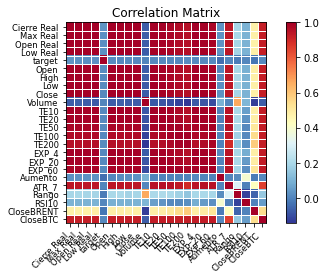

In [104]:
import statsmodels.api as sm
import seaborn as sns

corr2= AccionesT.corr()
sm.graphics.plot_corr(corr2, xnames=list(corr2.columns))
plt.show()

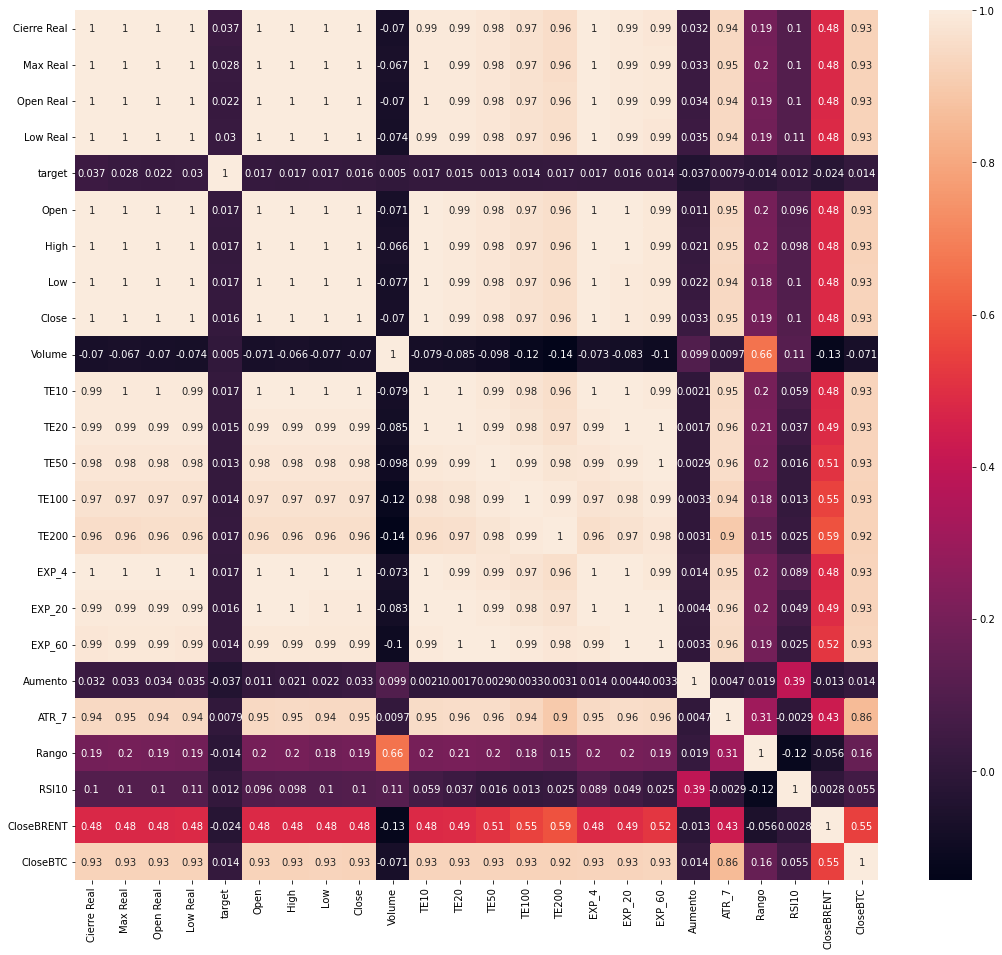

In [105]:

plt.figure(figsize=(18, 16))
sns.heatmap(corr2, annot=True)
plt.show()

In [ ]:
#Aquí termina el EDA, he comenzado con los modelos predictivos pero esto no lo reviséis por el momento

# Modelos predictivos K Nearest Neighbors 

from sklearn.neighbors import KNeighborsClassifier 


In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.model_selection import train_test_split

AccionesT=AccionesT.dropna()

In [ ]:
X=AccionesT.drop(["target", "Cierre Real", "Low Real", "Max Real"], axis=1)

X.columns

Index(['Open Real', 'Open', 'High', 'Low', 'Close', 'Volume', 'TE10', 'TE20',
       'TE50', 'TE100', 'TE200', 'Aumento', 'EXP_4', 'EXP_20', 'EXP_60',
       'ATR_7', 'Rango', 'RSI10', 'CloseBRENT', 'CloseBTC'],
      dtype='object')

In [ ]:
y=AccionesT["target"]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [ ]:
print("X_train forma:", X_train.shape)

X_train forma: (1359, 20)


In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=knn.predict(X_test)

print("puntuacion conjunto test:", format (np.mean(y_pred==y_test)))

knn.score(X_test, y_test)

puntuacion conjunto test: 0.513215859030837


0.513215859030837

In [ ]:
!pip install scikit-learn

In [ ]:
# ahora vamos a importar RandomForest para desarrollar el modelo 

from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1234)

In [ ]:
# vamos primero a entrenar todos los datos excepto los 100 últimos

predictores=['Open Real', 'Open', 'High',
       'Low', 'Close', 'Volume', 'TE10', 'TE20', 'TE50', 'TE100', 'TE200',
       'Aumento', 'EXP_20', 'EXP_60', 'ATR_7', 'Rango', 'RSI10', 'CloseBRENT',
       'CloseBTC']

train=AccionesT.iloc[:-100]
test=AccionesT.iloc[-100:]
model.fit(train[predictores], train["target"])

RandomForestClassifier(min_samples_split=200, random_state=1234)

In [ ]:
#Ahora calculamos la precisión del modelo, esto es, el número de verdaderos positivos dividido entre el 
#total de positivos, verdaderos + falsos
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [ ]:
preds=model.predict(test[predictores])

#lo convertimos en una serie para manejarlo mejor

preds=pd.Series(preds, index=test.index)

In [ ]:
accuracy_score(test["target"], preds)

0.49

In [ ]:
precision_score(test["target"], preds)

0.49

In [ ]:
# Datos Históricos (Backtesting)

start=10
step=10
i=10
predicciones=[]
for i in range(start, AccionesT.shape[0], step):
  train=AccionesT.iloc[0:i].copy()
  test=AccionesT.iloc[i:i+step].copy()
  model.fit(train[predictores], train["target"])
  preds=model.predict_proba(test[predictores])[:,1]
  preds[preds>.6]=1
  preds[preds<.6]=0
  preds=pd.Series(preds, index=test.index)
  combinados=pd.concat({"target": test["target"], "predicciones": preds}, axis=1)
  predicciones.append(combinados)


predicciones=pd.concat(predicciones)

In [ ]:
predicciones["predicciones"].value_counts()

0.0    1634
1.0     159
0.6      10
Name: predicciones, dtype: int64

In [ ]:
precision_score(test["target"], preds)

1.0

In [ ]:
accuracy_score(test["target"], preds)

1.0

In [ ]:
#Modelo de clasificación SVM

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

SyntaxError: invalid syntax (Temp/ipykernel_13548/2629604401.py, line 1)

In [ ]:
# Este resultado es interesante, puesto que garantiza que acertamos un 62,5% de las veces que decidimos comprar acciones


In [ ]:
# Predicción del valor de cierre "Cierre Real" y valor máximo "Max Real", usando modelos de regresion, teniendo todos los demás valores
# dejamos sólo los valores del día anterior y el valor de apertura real

In [ ]:
predictores2=['Open Real', 'Open', 'High',
       'Low', 'Close', 'Volume', 'TE10', 'TE20', 'TE50', 'TE100', 'TE200',
       'Aumento', 'EXP_20', 'EXP_60', 'ATR_7', 'Rango', 'RSI10', 'CloseBRENT',
       'CloseBTC']

X2=AccionesT[predictores2]
y2=AccionesT["Cierre Real"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X2, y2, train_size=0.8,random_state=1234)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
modelos = ['KNeighborsRegressor()', 'KNeighborsRegressor(n_neighbors=3)', 'KNeighborsRegressor(n_neighbors=6)', 'KNeighborsRegressor(n_neighbors=9)',
           'LinearRegression()', 
           'Ridge()', 'Ridge(0.1)', 'Ridge(0.01)', 'Ridge(10)', 'Ridge(100)',
           'Lasso()', 'Lasso(0.1)', 'Lasso(0.01)', 'Lasso(10)', 'Lasso(100)']
abs_error = []
sqr_error = []
score = []
for mod in modelos:
    modelo = eval(mod)
    modelo.fit(x_train,y_train)
    abs_error.append(metrics.mean_absolute_error(modelo.predict(x_test), y_test))
    sqr_error.append(metrics.mean_squared_error(modelo.predict(x_test), y_test))
    score.append(modelo.score(x_test,y_test))

ajust = pd.DataFrame({'modelos': modelos, 'abs_error': abs_error, 'sqr_error': sqr_error, 'score': score})

C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.07905e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.87777e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.09151e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.04174e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAl

In [ ]:
ajust

,modelos,abs_error,sqr_error,score
0,KNeighborsRegressor(),213.403755,89369.090721,-0.018307
1,KNeighborsRegressor(n_neighbors=3),188.302771,83337.985838,0.050413
2,KNeighborsRegressor(n_neighbors=6),222.110873,90940.241406,-0.036210
3,KNeighborsRegressor(n_neighbors=9),237.096825,96271.843296,-0.096960
4,LinearRegression(),5.501934,189.744872,0.997838
5,Ridge(),5.499863,189.680973,0.997839
6,Ridge(0.1),5.500800,189.717693,0.997838
7,Ridge(0.01),5.501562,189.740974,0.997838
8,Ridge(10),5.498976,189.684347,0.997839
9,Ridge(100),5.497568,189.773128,0.997838


In [ ]:
# vemos que el modelo Lasso, con un alfa de 10 es el que mejor ajusta el cierre real, con una puntuación de 0.998721



In [ ]:
#veamos ahora el volumen máximo 

predictores3=['Open Real', 'Open', 'High',
       'Low', 'Close', 'Volume', 'TE10', 'TE20', 'TE50', 'TE100', 'TE200',
       'Aumento', 'EXP_20', 'EXP_60', 'ATR_7', 'Rango', 'RSI10', 'CloseBRENT',
       'CloseBTC']

X3=AccionesT[predictores2]
y3=AccionesT["Max Real"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X2, y3, train_size=0.8,random_state=1234)

In [ ]:
modelos = ['KNeighborsRegressor()', 'KNeighborsRegressor(n_neighbors=3)', 'KNeighborsRegressor(n_neighbors=6)', 'KNeighborsRegressor(n_neighbors=9)',
           'LinearRegression()', 
           'Ridge()', 'Ridge(0.1)', 'Ridge(0.01)', 'Ridge(10)', 'Ridge(100)',
           'Lasso()', 'Lasso(0.1)', 'Lasso(0.01)', 'Lasso(10)', 'Lasso(100)']
abs_error = []
sqr_error = []
score = []
for mod in modelos:
    modelo = eval(mod)
    modelo.fit(x_train,y_train)
    abs_error.append(metrics.mean_absolute_error(modelo.predict(x_test), y_test))
    sqr_error.append(metrics.mean_squared_error(modelo.predict(x_test), y_test))
    score.append(modelo.score(x_test,y_test))

ajust = pd.DataFrame({'modelos': modelos, 'abs_error': abs_error, 'sqr_error': sqr_error, 'score': score})

C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.07905e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.87777e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.09151e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.04174e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ricca\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAl

In [ ]:
ajust

,modelos,abs_error,sqr_error,score
0,KNeighborsRegressor(),218.462382,94308.684027,-0.021526
1,KNeighborsRegressor(n_neighbors=3),192.761990,87847.568440,0.048459
2,KNeighborsRegressor(n_neighbors=6),227.198243,95847.678962,-0.038196
3,KNeighborsRegressor(n_neighbors=9),242.471338,101388.335049,-0.098211
4,LinearRegression(),3.416341,61.199077,0.999337
5,Ridge(),3.403595,61.001257,0.999339
6,Ridge(0.1),3.413232,61.135271,0.999338
7,Ridge(0.01),3.415941,61.190474,0.999337
8,Ridge(10),3.395921,60.923579,0.999340
9,Ridge(100),3.393576,60.856860,0.999341


In [ ]:
# De nuevo, el modelo Lasso 10 se impone, esta vez con puntuación de 0.999367

In [ ]:
#Ahora vamos a ver cómo predice el volumen máximo una regresión lineal que tome solamente el valor de apertura



In [ ]:
predictores4=['Open Real']

X4=AccionesT[predictores4]
y4=AccionesT["Max Real"]

x_train,x_test,y_train,y_test=train_test_split(X4, y4, train_size=0.8,random_state=1234)

In [ ]:
modelos = ['KNeighborsRegressor()', 'KNeighborsRegressor(n_neighbors=3)', 'KNeighborsRegressor(n_neighbors=6)', 'KNeighborsRegressor(n_neighbors=9)',
           'LinearRegression()', 
           'Ridge()', 'Ridge(0.1)', 'Ridge(0.01)', 'Ridge(10)', 'Ridge(100)',
           'Lasso()', 'Lasso(0.1)', 'Lasso(0.01)', 'Lasso(10)', 'Lasso(100)']
abs_error = []
sqr_error = []
score = []
for mod in modelos:
    modelo = eval(mod)
    modelo.fit(x_train,y_train)
    abs_error.append(metrics.mean_absolute_error(modelo.predict(x_test), y_test))
    sqr_error.append(metrics.mean_squared_error(modelo.predict(x_test), y_test))
    score.append(modelo.score(x_test,y_test))

ajust4 = pd.DataFrame({'modelos': modelos, 'abs_error': abs_error, 'sqr_error': sqr_error, 'score': score})

In [ ]:
ajust4

,modelos,abs_error,sqr_error,score
0,KNeighborsRegressor(),3.920900,81.221034,0.999120
1,KNeighborsRegressor(n_neighbors=3),4.209751,95.474091,0.998966
2,KNeighborsRegressor(n_neighbors=6),3.773635,78.072622,0.999154
3,KNeighborsRegressor(n_neighbors=9),3.591624,72.878366,0.999211
4,LinearRegression(),3.423108,61.546423,0.999333
5,Ridge(),3.423108,61.546426,0.999333
6,Ridge(0.1),3.423108,61.546423,0.999333
7,Ridge(0.01),3.423108,61.546423,0.999333
8,Ridge(10),3.423110,61.546449,0.999333
9,Ridge(100),3.423133,61.546679,0.999333
